# DM Assignment

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")

# Import libraries needed for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.impute import *
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import modules needed for stochastic purposes
import random
random.seed(574)

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataframe
df = pd.read_csv("kidneyChronic.csv")

In [4]:
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd


## Data Preprocessing/ Descriptive Summarization

In the given dataset, after reading we see that there are missing values which are represented using `?`. 

Let us read in the dataset with these values as nan values properly.

Also, since we're given the datatype of each and every variable explicitly, let us make use of that information by defining a map of these different datatypes systematically.

In [5]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [6]:
dtypes = {"age":"float", "bp":"float64", "sg": "str", "al": "str", "su":"str", "rbc":"str",
          "pc":"str", "pcc":"str", "ba":"str", "bgr":"float64", "bu":"float64", "sc":"float64",
          "sod":"float64","pot":"float64","hemo":"float64", "pcv":"float64", "wbcc":"float64",
          "rbcc":"float64","htn":"str", "dm":"str", "cad":"str", "appet":"str", "pe":"str",
          "ane":"str","class":"str"
         }

In [7]:
df = pd.read_csv("kidneyChronic.csv", na_values="?", dtype=dtypes)
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1,0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


In [8]:
# Have a look at the type of data that we are dealing with
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

We can see that there are some numeric and a few string/nominal attributes in the given dataset. So, we have 11 numeric and 14 nominal variables. Our target is also nominal. So this means

X: 11 + 13 - 24 variables

y: 1 - Single variable

We have to model this y which is the variable named `class` as a function of these 24 `X` input variables respectively.

Let's have a look at the numeric datatypes and their distribution in the dataset

In [9]:
df.select_dtypes("float64").describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


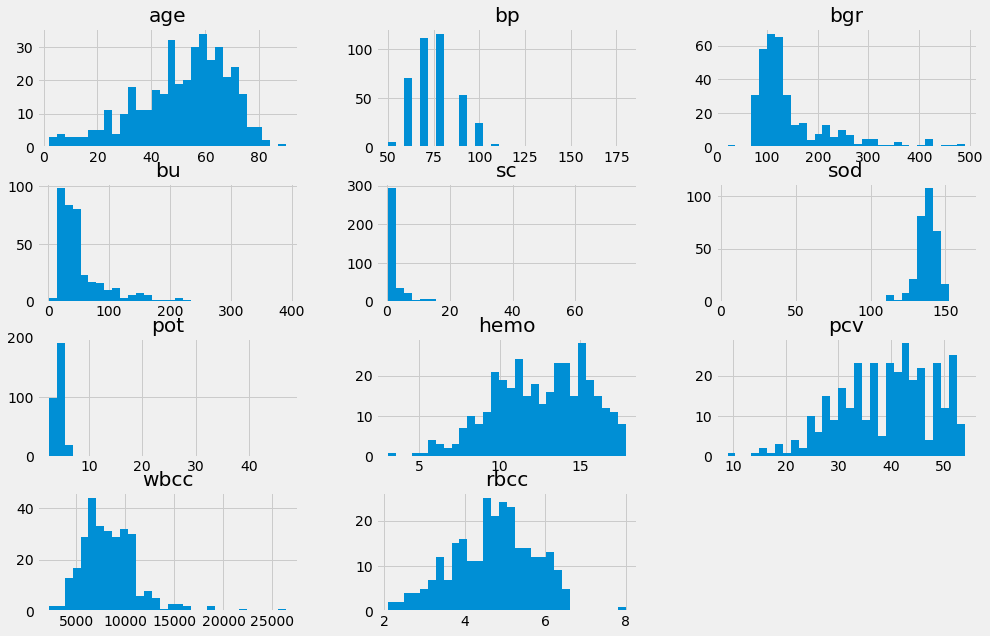

In [10]:
# Visualize the distribution of the numerical variables
df.hist(bins=30, figsize=(15, 10));

**Observations**

- Of the 400 observations, we have some data missing in each of the columns respectively as seen from their counts. The highest absent is in `rbcc` which is 33% and the lowest proportion of missing data is in age which is 2.5%.

- `Age`, `wbcc` and `rbcc` seems to be almost normally distributed with some small number of outliers.

- `bp`, `bgr`, `bu`, `sc`, `pot` seem to be right skewed in nature i.e. they have a long right tail. 

- `sod`, `hemo` and `pcv` seem to be left skewed in nature i.e. they have a longer left tail.

- The distributions are not very neat and clean as normal distributions and have multiple peaks and valleys, however there's some semblance to the distributions we have commonly encountered in textbooks.

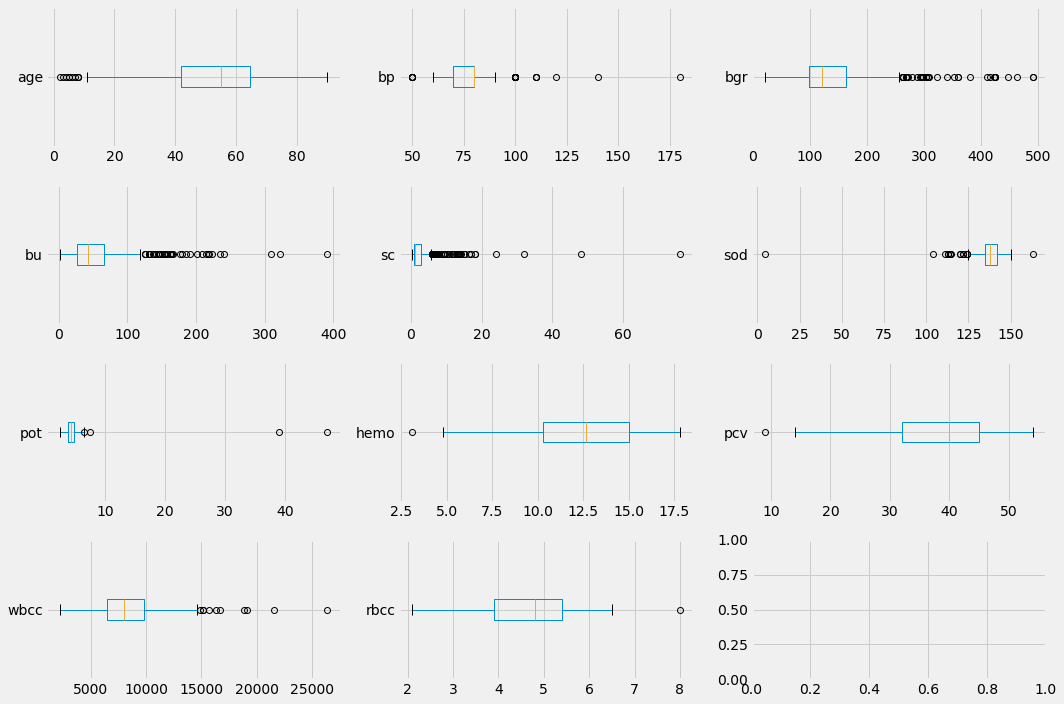

In [11]:
# Look at the boxplots to understand the outliers in the dataset
numerical_cols = df.select_dtypes("float64").columns
fig, ax = plt.subplots(4, 3, figsize = (15, 10));

for axis, col in zip(ax.flatten(), numerical_cols):
    df.boxplot(column = col, ax = axis, vert = False);
plt.tight_layout();

Looking at the boxplots of each variable separately, we can evidently see that there are several attributes where there are some outliers present in the dataset. In attributes like `pot`, `sod`, `bu` etc. there are clear instances of points which are potential outliers. 

We need to process them and take care of these potential outlier datapoints. We shall do that shortly after we inspect the categorical columns in the dataframe as well. We will use counts to analyse these datapoints.

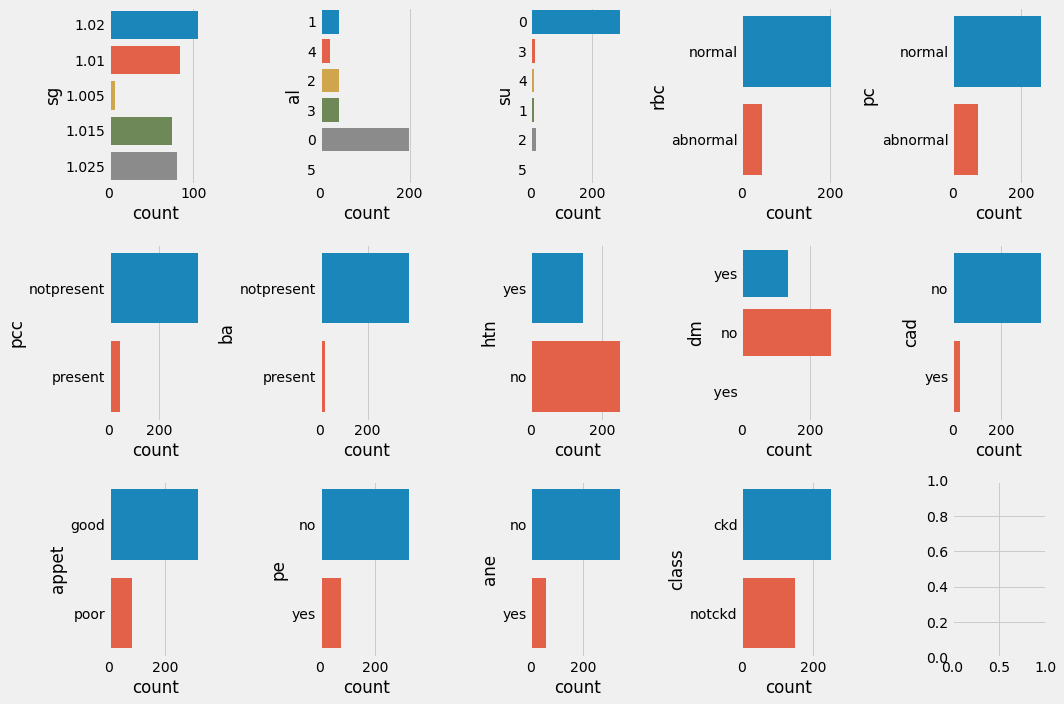

In [12]:
# Look at the boxplots to understand the outliers in the dataset
nominal_columns = df.select_dtypes("object").columns
fig, ax = plt.subplots(3, 5, figsize = (15, 10));

for axis, col in zip(ax.flatten(), nominal_columns):
    sns.countplot(y = col, data = df, ax = axis);

plt.tight_layout();

Here, we can observe that in most of the cases, our columns are highly imbalanced in nature; one observation is much more frequent than the other one.

Our target variable which is `class` also has some imbalance but not as worse as other points in our dataset.

Medical data can be expected to be this way because thankfully enough, the number of anomalies/worst case conditions are much less than those of average case or best case conditions. 

To tackle this imbalance in the datset in the input variables, we can do a weighted sampling so that we give higher weightage to the classes with lower counts and oversample them more often.

**Function to impute the values**

We cannot train our model with missing values. In order to perform any machine learning task, we need to perform imputation i.e. fill these very columns with a clever strategy or discard such rows altogether.

Discarding rows in our case will lead to reduction of a lot of data because of the sheer amount of missing values in the given dataframe. So, that's not an option. We will then try to perform mean/median imputation for numeric and mode imputation for nominal variables to fill in the missing data.

In [13]:
def impute(df_train, df_val, df_test, numerical_strategy = "mean", categorical_strategy = "most_frequent"):
    # Separate the numerical and categorical dataframes
    numerical_df_train = df_train.select_dtypes('float64')
    categorical_df_train = df_train.select_dtypes('object')
    
    if numerical_strategy == "knn":
        # Create a KNN-Imputation scheme for numerical data 
        numerical_imputer = KNNImputer(missing_values = np.nan, n_neighbors = 3)
    elif numerical_strategy == "mean":
        # Create a mean imputer for numerical columns
        numerical_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
    elif numerical_strategy == "median":
        # Create a median imputer for numerical columns
        numerical_imputer = SimpleImputer(missing_values = np.nan, strategy = "median")
    
    # Get the numerical imputed data
    imputed_numerical_train = numerical_imputer.fit_transform(numerical_df_train)
    imputed_numerical_val = numerical_imputer.transform(df_val.select_dtypes('float64'))
    imputed_numerical_test = numerical_imputer.transform(df_test.select_dtypes('float64'))
    
    # Create a mode imputation strategy for transforming categorical data
    mode_imputer = SimpleImputer(missing_values = np.nan, strategy = categorical_strategy)
    
    # Get the categorical imputed data
    imputed_categorical_train = mode_imputer.fit_transform(categorical_df_train)
    imputed_categorical_val = mode_imputer.transform(df_val.select_dtypes('object'))
    imputed_categorical_test = mode_imputer.fit_transform(df_test.select_dtypes('object'))
    
    cols = numerical_df_train.columns.tolist() + categorical_df_train.columns.tolist()
    imputed_train = pd.DataFrame(np.hstack([imputed_numerical_train, imputed_categorical_train]), columns = cols)
    imputed_val = pd.DataFrame(np.hstack([imputed_numerical_val, imputed_categorical_val]), columns = cols)
    imputed_test = pd.DataFrame(np.hstack([imputed_numerical_test, imputed_categorical_test]), columns = cols)
                                                
    return (imputed_train, imputed_val, imputed_test)

In [14]:
def scale_numerical(df_train, df_val, df_test, numerical_columns):
    X_tr = df_train[numerical_columns].values
    X_vl = df_val[numerical_columns].values
    X_ts = df_test[numerical_columns].values
    
    SS = StandardScaler()
    X_tr = SS.fit_transform(X_tr)
    X_vl = SS.transform(X_vl)
    X_ts = SS.transform(X_ts)
    
    return (X_tr, X_vl, X_ts)

In [15]:
def one_hot_encode_categorical(df_train, df_val, df_test, categorical_columns, target_variable:str = "class"):
    cols = categorical_columns
    cols.remove(target_variable)
    
    X_tr = df_train[cols].values
    X_vl = df_val[cols].values
    X_ts = df_test[cols].values
    
    ohe = OneHotEncoder()
    ohe.fit(X_tr)
    
    X_tr = ohe.transform(X_tr).toarray()
    X_vl = ohe.transform(X_vl).toarray()
    X_ts = ohe.transform(X_ts).toarray()
    
    return (X_tr, X_vl, X_ts)

## Feature Engineering

**Blood Pressure / Age**

We can construct a feature for blood pressure per unit age of the person. This will be an informative metric as far as the health of the individual is concerned i.e. to understand whether based on age the BP is high or low.

In [16]:
df["bp_age"] = df["bp"] / df["age"]

**hemoglobin / rbcc**

The proportion of hemoglobin to that of red blood cell counts is one more key information that can tell about the resistance power of an individual. Hemoglobin with iron must be high and also red blood cells count must also be high. This ratio will tell us the relative proportion of each of them in an individual.

In [17]:
df["hemo_rbccc"] = df["hemo"] / df["rbcc"]

## Data Transformation

In [18]:
numerical_columns = df.select_dtypes("float64").columns.tolist()
categorical_columns = df.select_dtypes("object").columns.tolist()

In [19]:
# Converting output into numerical ohe form
df["class"] = df["class"].apply(lambda x: 1 if x == "ckd" else 0)

In [20]:
def train_val_test_split(df, tr_pct:float = 0.7, vl_pct:float = 0.15):
    all_record_indices = df.index.tolist()
    random.seed(42)
    random.shuffle(all_record_indices)
    bp1, bp2 = int(tr_pct * len(df)), int((tr_pct + vl_pct) * len(df))
    tr_indices, vl_indices, ts_indices = all_record_indices[:bp1], all_record_indices[bp1:bp2], all_record_indices[bp2:]
    
    df_tr = df.iloc[tr_indices, :].reset_index(drop = True)
    df_vl = df.iloc[vl_indices, :].reset_index(drop = True)
    df_ts = df.iloc[ts_indices, :].reset_index(drop = True)
    
    return (df_tr, df_vl, df_ts)

In [21]:
# Create a train - validation - test split
df_tr, df_vl, df_ts = train_val_test_split(df)

In [22]:
# Get the target values in a separate variable
y_tr = df_tr["class"].tolist()
y_vl = df_vl["class"].tolist()
y_ts = df_ts["class"].tolist()

In [23]:
# impute the missing values in the dataframe
df_tr, df_vl, df_ts = impute(df_tr, df_vl, df_ts, numerical_strategy = "knn")

In [24]:
# Scale the numerical columns
X_tr_num, X_vl_num, X_ts_num = scale_numerical(df_tr, df_vl, df_ts, numerical_columns)

In [25]:
# One hot encode the categorical columns
X_tr_cat, X_vl_cat, X_ts_cat = one_hot_encode_categorical(df_tr, df_vl, df_ts, categorical_columns)

In [26]:
# Have a look at the shapes of the arrays pertaining to numerical features
X_tr_num.shape, X_vl_num.shape, X_ts_num.shape

((280, 13), (60, 13), (60, 13))

In [27]:
# Have a look at the shapes of the arrays pertaining to categorical features 
X_tr_cat.shape, X_vl_cat.shape, X_ts_cat.shape

((280, 38), (60, 38), (60, 38))

In [28]:
# Combine the numerical and categorical features into one single dataframe
X_tr = np.hstack([X_tr_num, X_tr_cat])
X_vl = np.hstack([X_vl_num, X_vl_cat])
X_ts = np.hstack([X_ts_num, X_ts_cat])

In [29]:
# Have a look at the shapes of the final features
X_tr.shape, X_vl.shape, X_ts.shape

((280, 51), (60, 51), (60, 51))

## Model Building

### Build a logistic regression classifier 

In [30]:
base_estimator = LogisticRegression()
param_grid = {"C":[0.01, 0.1, 1, 10, 100]}

gscv_lr = GridSearchCV(estimator = base_estimator, param_grid = param_grid)
gscv_lr.fit(X_tr, y_tr);

### Build a decision tree classifier

In [31]:
base_estimator = DecisionTreeClassifier()
param_grid = {"criterion" : ["gini", "entropy"],
              "max_depth" : [5, 10, 20, 30],
              "max_features" : ["auto", "sqrt", "log2"]}

gscv_dt = GridSearchCV(estimator = base_estimator, param_grid = param_grid)
gscv_dt.fit(X_tr, y_tr);

### Build a random forest classifier

In [32]:
base_estimator = RandomForestClassifier()
param_grid = {"criterion" : ["gini", "entropy"],
              "max_depth" : [5, 10, 20, 30],
              "max_leaf_nodes": [5, 10, 20, 30, 40],
              "max_features" : ["auto", "sqrt", "log2"]}

gscv_rf = GridSearchCV(estimator = base_estimator, param_grid = param_grid)
gscv_rf.fit(X_tr, y_tr);

## Model Evaluation

In [33]:
def plot_cm(ts, ps, plot_title, ax):
    cm = confusion_matrix(ts, ps)
    sns.heatmap(cm, square = True, norm = LogNorm(), ax = ax, cbar_kws={"shrink": 0.2, "format":"%.2f"},
                cmap = "YlGnBu", fmt = "d", annot = True, annot_kws={"size": 18}, 
                xticklabels = ["Not CKD", "CKD"], yticklabels = ["Not CKD", "CKD"])
    
    acc = round(accuracy_score(ts, ps) * 100, 2)
    fsc = round(f1_score(ts, ps, average = "macro") * 100, 2)
    plot_title = f"{plot_title}\nAcc: {acc:.2f}% F1: {fsc:.2f}%"

    ax.set_title(plot_title, fontsize = 13)
    ax.set_ylabel("Trues", fontsize = 8)
    ax.set_xlabel("Predictions", fontsize = 8)

In [34]:
def evaluate_model(model, trainset, validset, testset, modelname):
    # Get independent and dependent variables from given data
    Xt, yt = trainset
    Xv, yv = validset
    Xts, yts = testset
    
    # Predict on the train, validation and test sets
    yt_preds = model.predict(Xt)
    yv_preds = model.predict(Xv)
    yts_preds = model.predict(Xts)
    
    # Show the performance of the data on all the three sets
    fig, ax = plt.subplots(1, 3, figsize = (15,10))
    
    for axis, dset_type, ts, ps in zip(ax, ["train", "validation", "test"], [yt, yv, yts], [yt_preds, yv_preds, yts_preds]):
        plot_cm(ts, ps, f"{modelname} {dset_type.title()} Performance", axis)
    fig.tight_layout();

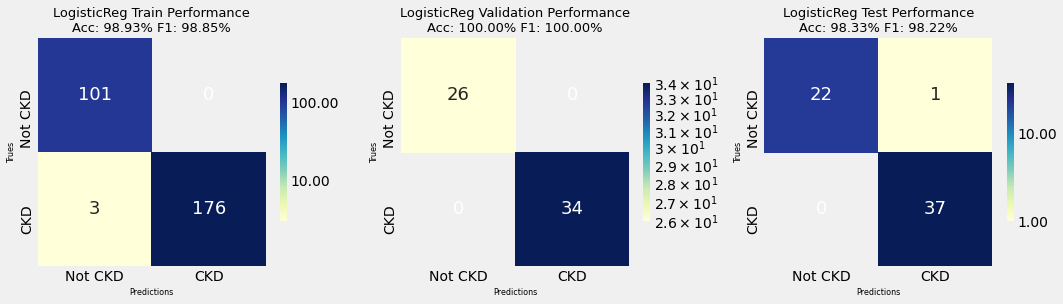

In [35]:
# Evaluate the performance of logistic regression model
evaluate_model(gscv_lr, (X_tr, y_tr), (X_vl, y_vl), (X_ts, y_ts), "LogisticReg")

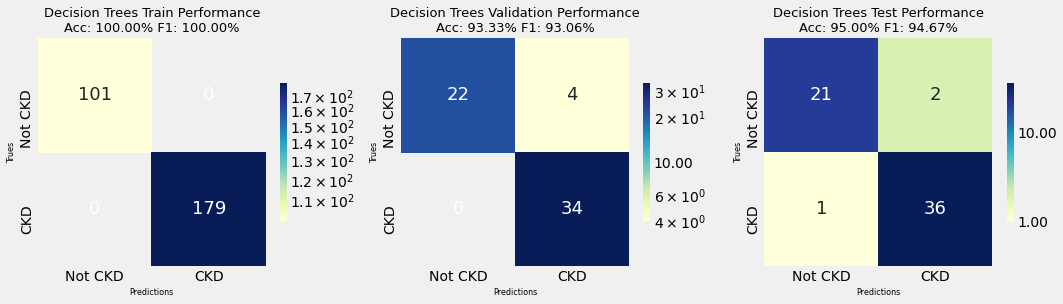

In [36]:
# Evaluate the performance of Decision Tree model
evaluate_model(gscv_dt, (X_tr, y_tr), (X_vl, y_vl), (X_ts, y_ts), "Decision Trees")

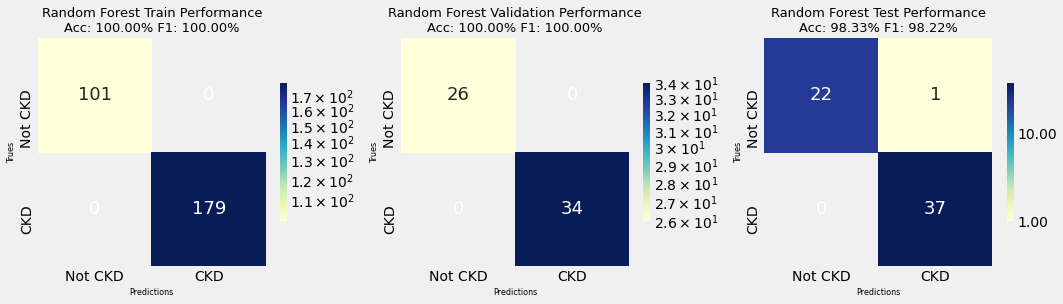

In [37]:
# Evaluate the performance of Random Forest model
evaluate_model(gscv_rf, (X_tr, y_tr), (X_vl, y_vl), (X_ts, y_ts), "Random Forest")

## Future Scope/ Refinement opportunities

1. The dataset is an imbalanced dataset. We can introduce synthetic oversampling techniques such as SMOTE / Undersampling/ Oversampling to balance the dataset and then create a model.

2. The number of datapoints is pretty low and amongst them, we can see that the number of missing values is high. We have used knn imputation currently, but we could also use mean/median/other imputation techniques and compare their performance.

3. Use of neural networks and deep learning (Multi-Layer Perceptron) models for the analysis of this problem.

4. Domain understanding for even better feature engineering to milk the predictive performance of the model even further.